In [2]:
# cargamos la tabla como DataFrame de PySpark
df = spark.read.table("lh_silver.slv_redata_demanda_evolucion_day_cleaned")

df.printSchema()

display(df.limit(5))


StatementMeta(, b13df7de-a73f-4ddd-a51c-f4bc7a3f9340, 4, Finished, Available, Finished)

root
 |-- geo_id: long (nullable = true)
 |-- geo_name: string (nullable = true)
 |-- geo_limit: string (nullable = true)
 |-- series_last_update: string (nullable = true)
 |-- datetime: timestamp (nullable = true)
 |-- value: double (nullable = true)
 |-- year: integer (nullable = true)



SynapseWidget(Synapse.DataFrame, 14e82726-610d-4875-b28a-b6070dc46743)

In [3]:
import pandas as pd

# también pasamos de PySpark a Pandas para tener visualizaciones
df_pandas = df.toPandas()

df_pandas.head()

StatementMeta(, b13df7de-a73f-4ddd-a51c-f4bc7a3f9340, 5, Finished, Available, Finished)

,geo_id,geo_name,geo_limit,series_last_update,datetime,value,year
0,8743,Islas Baleares,baleares,2025-01-29T08:59:00.000+01:00,2023-12-29 23:00:00,13997.624,2023
1,8743,Islas Baleares,baleares,2025-01-29T08:59:00.000+01:00,2024-04-29 22:00:00,15943.792,2024
2,8743,Islas Baleares,baleares,2025-08-14T14:58:18.000+02:00,2025-05-14 22:00:00,15268.881,2025
3,8743,Islas Baleares,baleares,2025-08-14T14:58:18.000+02:00,2025-09-12 22:00:00,20409.096,2025
4,8745,Comunidad de Melilla,melilla,2025-01-29T08:59:00.000+01:00,2023-11-24 23:00:00,493.277,2023


In [4]:
from pyspark.sql import functions as F

# imprimimos la suma total de demanda por cada territorio
df_ccaa = (df.groupBy("geo_name")
              .agg(F.avg("value").alias("demanda_media"))
              .orderBy(F.desc("demanda_media")))

display(df_ccaa)

StatementMeta(, b13df7de-a73f-4ddd-a51c-f4bc7a3f9340, 6, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 99bcb394-fa76-47db-829f-6c48409cdff2)

In [5]:
# imprimimos la suma total de demanda por cada territorio y año
# extraer el año de la columna datetime
df_with_year = df.withColumn("year", F.year("datetime"))

# agrupar por geo_name y año, sumar la demanda total
df_demanda_anual = (df_with_year
    .groupBy("geo_name", "year")
    .agg(F.sum("value").alias("demanda_total"))
    .orderBy("geo_name", "year")
)

display(df_demanda_anual)

StatementMeta(, b13df7de-a73f-4ddd-a51c-f4bc7a3f9340, 7, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 0f0fe7d6-a6b6-47a4-8758-7fcd9d035c22)

StatementMeta(, b13df7de-a73f-4ddd-a51c-f4bc7a3f9340, 8, Finished, Available, Finished)

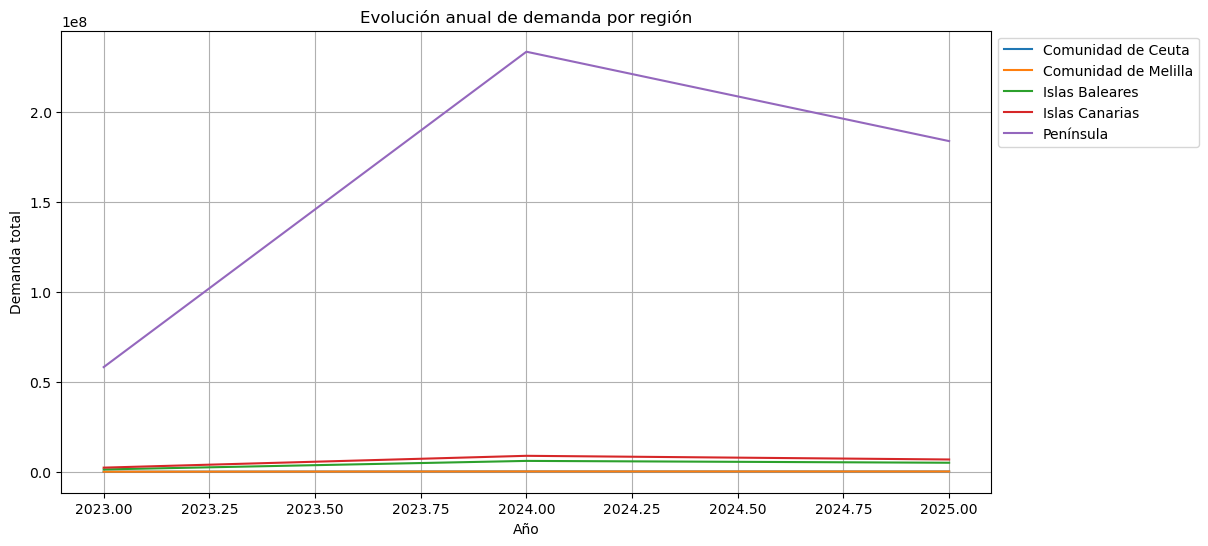

In [6]:
import matplotlib.pyplot as plt

pdf = df_demanda_anual.toPandas()

plt.figure(figsize=(12,6))
for region in pdf["geo_name"].unique():
    subset = pdf[pdf["geo_name"] == region]
    plt.plot(subset["year"], subset["demanda_total"], label=region)

plt.title("Evolución anual de demanda por región")
plt.xlabel("Año")
plt.ylabel("Demanda total")
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.grid(True)
plt.show()

In [8]:
import seaborn as sns

heatmap_data = df.groupby(["geo_name", "year"])["value"].sum().unstack().fillna(0)

plt.figure(figsize=(12,7))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=True, fmt=".0f")
plt.title("Mapa de calor de demanda total por CCAA y año")
plt.xlabel("Año")
plt.ylabel("Comunidad Autónoma")
plt.show()

StatementMeta(, b13df7de-a73f-4ddd-a51c-f4bc7a3f9340, 10, Finished, Available, Finished)

TypeError: 'GroupedData' object is not subscriptable